# PSET6 - 11-11.mn Classification (Training)

## Installing and Importing Libraries

In [14]:
!pip install -Uqq torchtext==0.8.0
!pip install -Uqq fastai
!pip install -Uqq fastcore
!pip install -Uqq pandas==1.1.0

In [15]:
import fastai
import fastcore
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)

Fast.ai version: 2.3.1
Fastcore version: 1.3.20


In [16]:
from fastai.text.all import *
from fastai.callback.progress import CSVLogger
import pandas as pd
import numpy as np
print('Pandas version:', pd.__version__)
print('numpy version:', np.__version__)

Pandas version: 1.1.5
numpy version: 1.19.5


## Setting a directory

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%cd '/content/drive/MyDrive/Deep Learning/11-11/'

/content/drive/MyDrive/Deep Learning/11-11


In [19]:
df = pd.read_csv('1111_dataset.csv')

In [20]:
np.random.seed(42)
df['is_valid'] = np.random.choice([0,1], size=len(df), p=[0.9, 0.1])

In [21]:
df = df.drop(['agency','source_text','status_text','created_at'], axis = 1)
df.rename(columns = {'content' : 'text', 'type_text' : 'label'}, inplace = True)

In [22]:
df.head()

,text,label,is_valid
0,Дулааны тухай,Гомдол,0
1,Ерөнхий сайдтай уулзах. Жолоочийн эрх ашиг алдагдаж байна.,Санал хүсэлт,1
2,Нефтийн үйлдвэр байгуулах тухай.,Санал хүсэлт,0
3,Жолооны үнэмлэх яагаад хэвлэгдэхгүй байна ?,Санал хүсэлт,0
4,БГД Гэмтэл-н эмнэлгийн гадуурх хашааг нураах тухай,Гомдол,0


In [23]:
with open('models/mn_20_news_vocab_ft.pkl', 'rb') as f:
      vocab = pickle.load(f)

In [24]:
data_blocks = DataBlock(blocks=(TextBlock.from_df('text', vocab=vocab), CategoryBlock),
                    get_x=ColReader('text'),
                    get_y=ColReader(1), 
                    splitter=ColSplitter())

In [25]:
dls = data_blocks.dataloaders(df)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [26]:
dls.show_batch()

,text,category
0,"xxbos уих - ын гишүүдэд илгээх ил захидал 2017 оны 1 дүгээр сар 10 улаанбаатар хот уих - ын эрхэм гишүүд та бүхний амар амгаланг эрж xxunk xxunk ? та бүхний төрийн хэргийг xxunk явуулах их үйл хэрэг түвшин амгалан буйзаа . би эгэл xxunk бор амьдрал дунд xxunk бор хоног шар өдрүүдийг чадан ядан өнгөрөөж буй дээдэс та бүхний xxunk гудамжны хүн xxunk гэгч xxunk нэгэн байна . би монгол хүний хувьд улс орон маань ингэж xxunk xxunk байгаад сэтгэл өвдөж монголын маань хойч ирээдүй гэрэлтэй г xxrep 3 э тэй байгаасаа гэсэн чин сэтгэлийн үүднээс өнөө ба ирээдүйн төлөө санаа xxunk өөрийн санаж бодож явдаг зүйлсээ та бүхний сонорт хүргэхээр арваад жил дотроо xxunk за яахав дараагийн засаг төр гараад сайхан болчих байх хэмээн итгэж , найдаж , гоё үг , гоё xxunk хууртаж явсан боловч өнөөдрийн манай нийгэм , улс төр , эдийн засгийн гажуудал , дампуурал",Санал хүсэлт
1,"xxbos тег - ын дарга ариунсан танаа , “ амь авраач xxrep 4 ! гуйж байна . та хүнийг боддоггүй юмаа гэхэд өөрийгөө бодмоор юм . хариуцлага тооцно , шүүхэд өгнө шүү . та өөрөө үр хүүхэдтэй хүн . миний хүүг хүн тамлан алж байгаа . "" амь авраач "" гэж гуйж бна . та нар тушаал өгөхөд хангалттай . монголын ард түмэн туслая гэж байгаа . та нар яагаад хөдлөхгүй байгаа нь сонин байна . тэр гарах зардалыг нь “ багажтай эмэгтэй”-ээр өөрөөр нь гаргуулна биз дээ . өчнөөн жил ийм нүгэлтэй юм хийгээд байж байдаг мөнгөтэй хүн байлгүй . та нар тангараг тавьж гарч ирчихээд яагаад хүлээсэн үүрэг хариуцлагынхаа дагуу ажлаа хийгүй байгаа юм бэ ? энэ бол хүний эрхийг дээд зэргээр зөрчсөн гэмт хэрэг . надад үнэндээ худлаа ярих ухаан , зорилго , учир шалтгаан байхгүй . техник өндөр хөгжсөн байна . би өөрөө ч итгэж чадахгүй",Гомдол
2,xxbos миний бие мягмарсүрэн овогтой xxunk нь 1989 онд завхан аймгийн баянтэс суманд төрсөн . 1997 - 2007 онд тус сумын ебс - ийг төгсөж 2007 онд мубис - ын бус - ын биологийн багш мэргэжлээр төгссөн . 2013 оны 05-р сард баянзүрх дүүргийн амгалан цогцолбор сургуульд биологийн багшаар ажилд ороод 2014 оны 09 сарын 09-ны өдөр хүртэл ажиллаа . ажиллаж байх хугацаандаа ямар нэгэн хариуцлагагүй алдаа гаргаж байгаагүй . 6-р анги даан 2013 оны 09-р сарын 01-ээс ажиллаж байсан . тус сургуулийн захиралаар н . алимаа нь сонгогдон ажиллаад удалгүй ангиа хүлээлгэж өг хэмээн сувдмаа багшид хариуцуулан өгсөн . 05-р сард дуудан багшийн сонгон шалгаруулалтанд орохгүй бол ажлаас хална гэсэн боловч энэ багшийн сонгон xxunk журам нь нийслэлийн боловсролын газрын даргын тушаалаар 2013 оны 08-р сарын 19-ний өдрийн а / 74 тоот тушаалаар батлагдсан учраас надад үйлчлэхгүй гэсэн боловч хүлээн xxunk . ингээд ажилаа хэвийн үргэлжлүүлж ажиллаж байгаад 2014,Гомдол
3,"xxbos xxup tsagdaagiin xxup yeronhii xxup gazar , shuurhai xxup udirdlagin xxup xxunk , xxrep 4 1 xxup tovd : minii biye 2013 oni 5 sarin xxunk xxunk 11 tsagiin uyed yarmagiin xxunk buudlaas ( xxunk xxunk zuun urd baidag ailuudin xxunk xxunk olon hun xxunk baruun talin tsonhoor shoroo xxunk orj ireed baisand bi avtobusni zuun urd talin tsonhni havid ochij xxunk xxunk getel negen zaluu xxunk xxunk deed xxunk changa huchtei xxunk xxunk yavuulahgui baisan iimd xxunk baigaa yum uragshaa yavuulahgui “ gehed ter xxunk garaa avahgui , xxunk xxunk bi xxunk uragshaa yavah gehed ter minii xxunk gadna tal ruu huchtei xxunk mon hamt yavj baisan zaluu huuhedteigee hamtran xxunk xxunk xxunk bi avtobusni uragshaa xxunk xxunk uyed ted eldveer namaig xxunk , xxunk xxunk hen n ch namaig xxunk buudlin havid yavj baihdaa tsagdaa xxunk bodon humuusees gar xxunk xxrep 3 a xxunk duudlaga ogch tuslahig",Санал хүсэлт
4,"xxbos арван долоодугаар жарны гал тахиа жил 2017 дугаар оны 1 дүгээр сарын 20 дугаар өдөр зам тээврийн хөгжлийн яамны сайд , зам тээврийн хөгжлийн яамны төрийн нарийн бичгийн дарга , нийслэлийн тээврийн газрын дарга болон бусад захиргааны ажилтан албан хаагчид , зорчигч тээврийн нэгтгэл , xxunk , сутайн буянт , автобус нэгдэл , мяралзаа , xxunk , тэнүүн огоо , трансбус , атибус , xxunk , xxunk , xxunk , xxunk , xxunk , сайхан и

In [27]:
dls.vocab[1]

['Гомдол', 'Санал хүсэлт', 'Талархал', 'Шүүмжлэл', 'Өргөдөл']

## Training 

In [28]:
#pretrained = False
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, pretrained=False, 
                                 metrics=[accuracy]).to_fp16()

In [29]:
notebook_path = Path('').absolute()

In [30]:
learn.path = notebook_path

In [31]:
learn.load_encoder(notebook_path/'models/mn_20_news_encoder_ft')

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.03981071710586548)

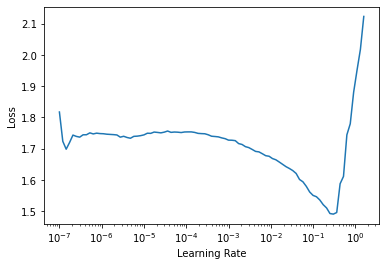

In [32]:
learn.lr_find()

In [33]:
# lerning rate = 10^-0.95
lr = 3e-2

In [34]:
cbs=[CSVLogger(fname='classification_1111.mn.csv')]

In [35]:
learn.fine_tune(3, lr, cbs=cbs)

epoch,train_loss,valid_loss,accuracy,time
0,0.694556,0.643127,0.750286,03:27


epoch,train_loss,valid_loss,accuracy,time
0,0.611922,0.582309,0.775996,08:53
1,0.552377,0.544747,0.784142,08:52
2,0.480966,0.535497,0.788851,08:52


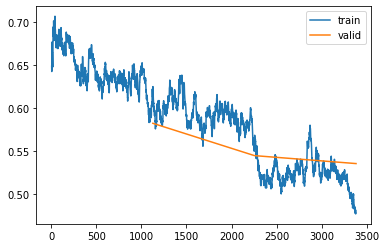

In [36]:
learn.recorder.plot_loss()

In [37]:
learn.export()

## Performing a inference

In [38]:
df.sample(10, random_state=42)

,text,label,is_valid
46374,"5-р сард овог солиулсан 6-р сараас хойш хүүхдийн 20,0 төгрөг нь орохгүй байна.Золзаяа овогтой Нэрмэнд Өнөржаргал овогтой Нэрмэнд болгож өөрчилсөн.рд:НД99061511 Овог нэрийн зөрчилтэй байгаа эсэхийг шалгаж өгнө үү.",Санал хүсэлт,0
25073,Тв5 телевиз хөдөө орон нутагт гарахгүй байна. Яагаад гарахгүй баыгаа шалтгааныг хэлж өгнө үү.,Санал хүсэлт,0
17247,СХД-ийн түргэн тусламжийн төв хүүхэд үзэхгүй байна. Хүүхэд үздэг эмч нь түргэнд явсан гэж байна. Хүлээн авах дээр эмчтэй байх хэрэгтэй байна. Түргэн тусламжийн 4 машин гадаа нь байна. Том хүн үздэг эмч нь байна. Хүүхэд үзэхгүй гээд байна. Энэ тал дээр арга хэмжээ авч өгнө үү.,Санал хүсэлт,0
32744,"Ерөнхий сайдад: Цалин нэмэх сургаар бараа бүтээгдэхүүний үнэ өсдөг. Иймээс цалин нэмээд ямар ч нэмэр байхгүй байна. Худалдааны хууль, Үнэ бүрдэлтийн хуулийг яаралтай гаргах хэрэгтэй байна.",Санал хүсэлт,0
48736,"manai hvvhdiin mungu orohgvi bn aa Bilgvvn owogtoi Enerel EO13271410 vvniig shalgaad ogno vv 1,2 sariinh ni mungu oroogvi orohgvi bn",Санал хүсэлт,0
66735,Ховд аймгийн Үент сумын иргэн байна. Ажлын хүнд нөхцөлөөр тэтгэвэрт гарахаар болзол хангасан ба шүүхийн шийдвэр нь гарсан байхад Ховд аймгийн нийгмийн даатгалын хэлтэсээс боломжгүй гэж байна. Энэ асуудлыг яаралтай шийдвэрлэж өгнө үү.,Санал хүсэлт,0
64492,Толгойт орчмын замыг хэзээ засч өгөх вэ? энэ асуудалд тодорхой хариу өгнө үү.,Санал хүсэлт,0
30149,kig gedeg kompanii oruulj irj baigaa kioskiig shalgaj baigaa yum bn bz dyyrgiin zasag dargiin tamgiin gazraas hydaldsan kiosgiig yagaad shalgaj ogdoggyi yum be yamriig n shalgaad yamriig n shalgaj ogdoggyi yum be,Гомдол,0
64702,3-р төрөх эмнэлгийн үйл ажиллагаа маш муу байна.Хүлээн авах нь ачаалал багатай байгаа хирнээ ажлаа хийгээд түргэн шуурхай үйлчлэхгүй юм.,Шүүмжлэл,0
50194,БЗД-ийн 17-р хорооны 666-р гудамжинд амьдардаг. Манай гудамжинд байнга 15-20 машин эгнүүлж худалдаа хийдэг. Энд байгаа хүмүүс гудамж талбайруу шээж бааж орчин тойронг бохирдуулж байна. Энэ талаар өөрсдөн хэлэхээр танхай улсууд тухайн оршин суугчдыг элдвээр хэлж зодож байна. Энэ асуудлаар хорооны Засаг даргад хэлсэн боловч асуудлыг шийдэж өгч чадахгүй байна. Энэ машины худалдаа хийж байгаа асуудлыг болиулж өгнө үү. Арга хэмжээ авч өгнө үү.,Санал хүсэлт,0


In [39]:
dl = learn.dls.test_dl(df.sample(10, random_state=42)['text'])

In [40]:
probs, name, decoded = learn.get_preds(dl=dl, with_decoded=True)

In [41]:
vocab = learn.dls.vocab[1]
mapper = lambda t: vocab[t]
vfunc = np.vectorize(mapper)
cats = vfunc(decoded)

In [42]:
cats

array(['Санал хүсэлт', 'Санал хүсэлт', 'Санал хүсэлт', 'Санал хүсэлт',
       'Санал хүсэлт', 'Санал хүсэлт', 'Санал хүсэлт', 'Санал хүсэлт',
       'Шүүмжлэл', 'Санал хүсэлт'], dtype='<U12')

In [45]:
df.sample(10, random_state=42)['label']

46374    Санал хүсэлт
25073    Санал хүсэлт
17247    Санал хүсэлт
32744    Санал хүсэлт
48736    Санал хүсэлт
66735    Санал хүсэлт
64492    Санал хүсэлт
30149          Гомдол
64702        Шүүмжлэл
50194    Санал хүсэлт
Name: label, dtype: object